In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C://Users//shrad//OneDrive//Desktop//Python Practice jupyter notebook//UNZIP_FOR_NOTEBOOKS_FINAL//DATA//mouse_viral_study.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


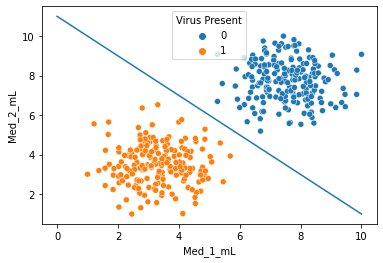

In [9]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,hue='Virus Present')

#hyperplane or a line seperating the classes
x=np.linspace(0,10,100)
m=-1
c=11
y=m*x+c

plt.plot(x,y)

In [10]:
from sklearn.svm import SVC

In [11]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

## Important
 C : float, default=1.0
 |      Regularization parameter. The strength of the regularization is
 |      inversely proportional to C. Must be strictly positive. The penalty
 |      is a squared l2 penalty.

In [12]:
y=df['Virus Present']
X=df.drop('Virus Present',axis=1)

In [13]:
model=SVC(C=1000,kernel='linear')

In [14]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [15]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


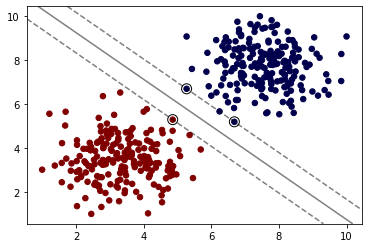

In [17]:
plot_svm_boundary(model,X,y)

In [19]:
model=SVC(C=0.5,kernel='linear')

In [20]:
model.fit(X,y)

SVC(C=0.5, kernel='linear')

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


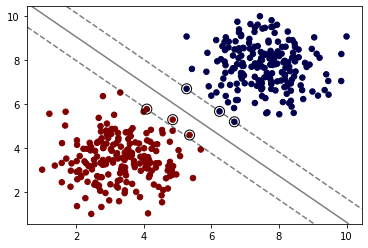

In [21]:
plot_svm_boundary(model,X,y)
#more points inside the actual margins

We can perform cross validation grid search to know the optimal value of C to get the correct model

# Radial Basis kernal

In [47]:
model=SVC(C=1,kernel='rbf',gamma='scale')

In [48]:
model.fit(X,y)

SVC(C=1)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


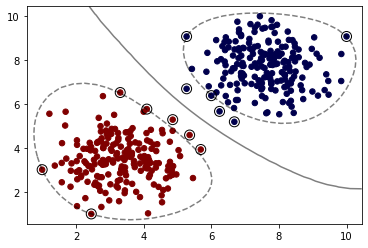

In [49]:
plot_svm_boundary(model,X,y)


In [51]:
model=SVC(kernel='sigmoid')
model.fit(X,y)

SVC(kernel='sigmoid')

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


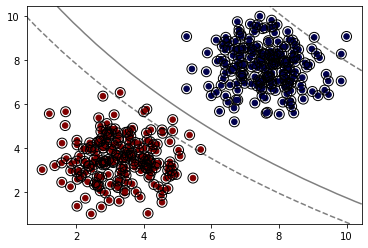

In [52]:
plot_svm_boundary(model,X,y)

# Polynomial Kernel

In [56]:
model=SVC(kernel='poly',C=1,degree=6)

In [57]:
model.fit(X,y)

SVC(C=1, degree=6, kernel='poly')

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


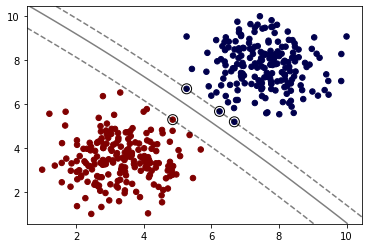

In [58]:
plot_svm_boundary(model,X,y)

margin looks like clustures

In [59]:
from sklearn.model_selection import GridSearchCV

In [61]:
model=SVC()

In [62]:
PARAM_GRID={'C':[0.1,1,10,100,1000,10000],'kernel':['radial','linear','poly'],'gamma': [0.1,0.5,1,2]}

In [63]:
grid_model=GridSearchCV(model,param_grid=PARAM_GRID,cv=5,verbose=1,scoring='accuracy')

In [64]:
grid_model.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\shrad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrad\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\shrad\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.py

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.1, 0.5, 1, 2],
                         'kernel': ['radial', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

In [66]:
grid_model.best_estimator_.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Support Vector Machines for regression

In [67]:
df=pd.read_csv("C://Users//shrad//OneDrive//Desktop//Python Practice jupyter notebook//UNZIP_FOR_NOTEBOOKS_FINAL//DATA//cement_slump.csv")

In [68]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


<AxesSubplot:>

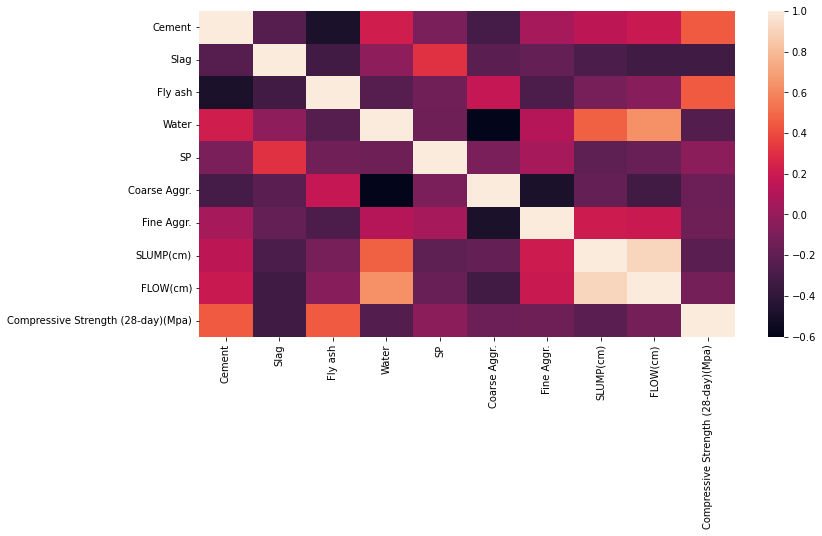

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [75]:
y=df['Compressive Strength (28-day)(Mpa)']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
scaler=StandardScaler()

In [78]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [79]:
from sklearn.svm import LinearSVR,SVR

In [80]:
model=LinearSVR()

In [81]:
model.fit(X_train,y_train)

LinearSVR()

In [84]:
pred=model.predict(X_test)

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [87]:
MSE=mean_squared_error(y_test,pred)
MSE

14.422112962383093

In [88]:
mean_absolute_error(y_test,pred)

2.847340501043492

In [89]:
## SVR
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [90]:
base_model=SVR()

In [91]:
base_model.fit(X_train,y_train)

SVR()

In [92]:
pred1=base_model.predict(X_test)

In [93]:
MSE=mean_squared_error(y_test,pred1)
MSE

44.835275522129486

In [94]:
mean_absolute_error(y_test,pred1)

5.236902091259179

In [95]:
from sklearn.model_selection import GridSearchCV

In [98]:
model=SVR()

In [ ]:
param_grid={'kernel':['linear','poly','radial'],'degree':[1,2,3,4,5],'gamma':[1.0,0.5,0.75,2],'C':[0.1,1,10,100,1000]}

In [99]:
grid_svm=GridSearchCV(model,param_grid=param_grid,cv=5)

In [101]:
grid_svm.fit(X_train,y_train)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrad\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\shrad\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.p

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [1.0, 0.5, 0.75, 2],
                         'kernel': ['linear', 'poly', 'radial']})

In [103]:
grid_svm.best_estimator_.get_params()

{'C': 1000,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.1,
 'gamma': 2,
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [104]:
grid_svm.predict(X_test)

array([17.94968165, 36.77543841, 33.30163297, 30.87317071, 47.58523748,
       39.19579869, 35.02551062, 39.12199692, 38.00103437, 51.48348767,
       34.59425277, 30.80794332, 29.23745748, 33.40595264, 45.28294482,
       46.56973109, 46.82991605, 34.74220932, 31.15816222, 33.7405221 ,
       41.28929529, 36.77080075, 34.98377802, 31.39007745, 49.34629537,
       39.46593427, 31.66119389, 28.5190594 , 36.8081258 , 29.66998045,
       31.36573389])

In [105]:
pred1=grid_svm.predict(X_test)

In [107]:
MSE=mean_squared_error(y_test,pred1)
MSE

11.47279534391089

In [108]:
mean_absolute_error(y_test,pred1)

2.739647818212404